Importing Libraries

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as mpl
import time
import os

Changing Current WD and getting data

In [2]:
#Changing current working directory
os.chdir(r"C:\Users\Fernando\Documents\STUFF\GALILEO\2-Statistical Learning ML\3.9 Tarea1")
os.getcwd()
##Importing data
data = np.load("C:\\Users\\Fernando\\Documents\\STUFF\\GALILEO\\Completed\\1-Python\\16. PROYECTO FINAL\\proyecto_training_data.npy").astype(np.float32)
np.set_printoptions(suppress=True) 
data[0:10, :] #Viendo las primeras 10 filas de los datos.

array([[208500.,      7.,    856.,      8.,   2003.,     65.],
       [181500.,      6.,   1262.,      6.,   1976.,     80.],
       [223500.,      7.,    920.,      6.,   2001.,     68.],
       [140000.,      7.,    961.,      7.,   1915.,     60.],
       [250000.,      8.,   1145.,      9.,   2000.,     84.],
       [143000.,      5.,    796.,      5.,   1993.,     85.],
       [307000.,      8.,   1694.,      7.,   2004.,     75.],
       [200000.,      7.,   1107.,      7.,   1973.,     nan],
       [129900.,      7.,   1022.,      8.,   1931.,     51.],
       [118000.,      5.,   1077.,      5.,   1939.,     50.]],
      dtype=float32)

Dividing data set into training and test set. Also, visualizing the column names for reference.

In [12]:
#OverallQualf es la variable con mayor correlacion con el precio de venta.
#OVerallQUalf Col = 1
#Assigning 80% of data to training and 20% to test
tr= data[0:round(data.shape[0]*.8),:]
t = data[round(data.shape[0]*.8):,:]
#Column names
cols = np.array(["SalePrice", "OverallQual", "1stFloorSqf", "TotRmsAbvGrd", "YearBuilt","LotFrontage"])
cols

array(['SalePrice', 'OverallQual', '1stFloorSqf', 'TotRmsAbvGrd',
       'YearBuilt', 'LotFrontage'], dtype='<U12')

Saving records into float arrays, X and Y.

In [13]:
#Saves all records from 2nd column (index = 1) - OVerallQualification column (range 1-10)
x = np.asarray(tr[:,1]).astype('float32')
#Saves all records from 1st column (index = 0) - SalePRice Column ($34900 to $755000)
y = np.asarray(tr[:,0]).astype('float32')

Now creating the graph, icluding operations into nodes for better visualization.

In [14]:
#Creating and defining the Graph
tf.reset_default_graph() #Resets the graph
graph= tf.Graph()#Assigns/Creates graph object into variable = graph
#Defines graph and sets it as default in TF. Graph for a Linear Regression

with graph.as_default():
    #Defining TF place holders for X (features) and Y(topredict)
    X = tf.placeholder("float", name="X") 
    Y = tf.placeholder("float", name="Y")
    #Defining TF place holder for the learning rate    
    lrate = tf.placeholder("float", name="lrate")
    W = tf.Variable(0.5, name = "w", dtype = "float") #starting W as var, initvalue = 0.5
    B = tf.Variable(0, name = "b", dtype = "float") #starting B as var, initvalue = 0
    
    with tf.name_scope("Hypothesis"):
        #Creates and stores the hypothesis function in node
        hyp = tf.add(tf.multiply(X,W, name="Hyp_X_by_W"), B,name="Hyp_XW_plus_B")
    with tf.name_scope("Cost"):
        #Creates and stores the cost function in node Cost
        cost = tf.reduce_mean(tf.pow(hyp-Y, 2,name="Squared_Err"), name="MeanSqErr")/2
    with tf.name_scope("Grad_Desc_Opt"):
        cost_summary =tf.summary.scalar("CostSummary", cost)
    
    #Specifying the optimizer with learning rate  = lr
    optimizer= tf.train.GradientDescentOptimizer(lrate).minimize(loss=cost)
    init = tf.global_variables_initializer()    


Defining training function.

In [24]:
#Function to train the model. Run epochs times (100 as default)
def trainmodel(epochs = 300, lr=0.1, prints = 10):
    tf.reset_default_graph() #resets default graph (cleans space)
    #Starts TF Session using the defined graph above and calls it sess (alias)
    start = time.time()
    with tf.Session(graph=graph) as sess:
        #stores summary log into ./graphs/lr folders+lr. lr is the used learning rate
        writer = tf.summary.FileWriter('./graphs/lr='+str(lr), sess.graph)
        #Initialize the variables by calling init=tf.global_variables_initializer()
        sess.run(init)
        for epoch in range(epochs):
            #runs optimizer and CostSummary and store the value of costsummary 
            #in c, ommits optimizer values (runs it but doesnt save those)
            _, c = sess.run([optimizer, cost_summary],feed_dict = {X:x,Y:y,lrate:lr}) 
            writer.add_summary(c, epoch+1)
            #If the iteration matches with the print step,then PRINT
            if (epoch+1) % prints == 0:
                co, we, intercept = sess.run([cost, W, B], feed_dict = {X:x, Y:y, lrate:lr})
                print(f'Epoch={epoch+1}, cost={co}, W = {we}, b={intercept}')
                
        writer.close
    end = time.time()
    
    print("Total time ",end-start)

Calling function with the different learning rate values>

Learning Rate = 0.1

In [25]:
trainmodel(lr=0.1)

Epoch=10, cost=6.591953519149633e+19, W = -1792092672.0, b=-279833504.0
Epoch=20, cost=2.412162698774675e+29, W = -108408665538560.0, b=-16927639470080.0
Epoch=30, cost=inf, W = -6.557886470776947e+18, b=-1.0239874797341245e+18
Epoch=40, cost=inf, W = -3.967007981560288e+23, b=-6.194313077160238e+22
Epoch=50, cost=inf, W = -2.399724835484763e+28, b=-3.7470794498470866e+27
Epoch=60, cost=inf, W = -1.4516355700043963e+33, b=-2.266673241062941e+32
Epoch=70, cost=nan, W = nan, b=-inf
Epoch=80, cost=nan, W = nan, b=nan
Epoch=90, cost=nan, W = nan, b=nan
Epoch=100, cost=nan, W = nan, b=nan
Epoch=110, cost=nan, W = nan, b=nan
Epoch=120, cost=nan, W = nan, b=nan
Epoch=130, cost=nan, W = nan, b=nan
Epoch=140, cost=nan, W = nan, b=nan
Epoch=150, cost=nan, W = nan, b=nan
Epoch=160, cost=nan, W = nan, b=nan
Epoch=170, cost=nan, W = nan, b=nan
Epoch=180, cost=nan, W = nan, b=nan
Epoch=190, cost=nan, W = nan, b=nan
Epoch=200, cost=nan, W = nan, b=nan
Epoch=210, cost=nan, W = nan, b=nan
Epoch=220, co

### Hipotesis
1. Considero que los valores de 0.1, 1 y 10 (grandes), van a diverger rapidamente... es decir, el paso de aprendizaje es muy grande.
2. Valores muy pequeños del learning rate como 0.0001 y 0.001 puede que no avancen lo suficiente como para encontrar una solucion.

In [26]:
trainmodel(lr=0.0001)

Epoch=10, cost=18019008512.0, W = 1167.2474365234375, b=177.27999877929688
Epoch=20, cost=16736150528.0, W = 2288.103515625, b=347.3945617675781
Epoch=30, cost=15552288768.0, W = 3364.875244140625, b=510.6257019042969
Epoch=40, cost=14459784192.0, W = 4399.296875, b=667.2442626953125
Epoch=50, cost=13451573248.0, W = 5393.03564453125, b=817.5105590820312
Epoch=60, cost=12521162752.0, W = 6347.693359375, b=961.6746826171875
Epoch=70, cost=11662548992.0, W = 7264.80615234375, b=1099.9766845703125
Epoch=80, cost=10870189056.0, W = 8145.853515625, b=1232.6474609375
Epoch=90, cost=10138968064.0, W = 8992.2548828125, b=1359.908447265625
Epoch=100, cost=9464173568.0, W = 9805.3720703125, b=1481.9727783203125
Epoch=110, cost=8841445376.0, W = 10586.5185546875, b=1599.0447998046875
Epoch=120, cost=8266771968.0, W = 11336.9482421875, b=1711.3211669921875
Epoch=130, cost=7736438784.0, W = 12057.8720703125, b=1818.990478515625
Epoch=140, cost=7247031808.0, W = 12750.451171875, b=1922.2342529296875

In [27]:
trainmodel(lr=0.001)

Epoch=10, cost=9344902144.0, W = 9952.44921875, b=1504.937255859375
Epoch=20, cost=4903075840.0, W = 16566.33984375, b=2488.67236328125
Epoch=30, cost=2942612224.0, W = 20962.65234375, b=3126.1640625
Epoch=40, cost=2077259136.0, W = 23885.7578125, b=3533.643310546875
Epoch=50, cost=1695217920.0, W = 25830.169921875, b=3788.325927734375
Epoch=60, cost=1526479488.0, W = 27124.40234375, b=3941.509033203125
Epoch=70, cost=1451878272.0, W = 27986.69921875, b=4027.27001953125
Epoch=80, cost=1418824576.0, W = 28562.048828125, b=4068.248046875
Epoch=90, cost=1404107136.0, W = 28946.763671875, b=4079.483154296875
Epoch=100, cost=1397481984.0, W = 29204.841796875, b=4070.966064453125
Epoch=110, cost=1394428160.0, W = 29378.78125, b=4049.335205078125
Epoch=120, cost=1392950656.0, W = 29496.828125, b=4018.999755859375
Epoch=130, cost=1392169216.0, W = 29577.7421875, b=3982.8896484375
Epoch=140, cost=1391695360.0, W = 29633.986328125, b=3942.949951171875
Epoch=150, cost=1391356416.0, W = 29673.8417

In [28]:
trainmodel(lr=0.01)

Epoch=10, cost=1393073792.0, W = 29523.908203125, b=4120.68115234375
Epoch=20, cost=1390116480.0, W = 29774.064453125, b=3672.765869140625
Epoch=30, cost=1387824512.0, W = 29848.994140625, b=3199.791015625
Epoch=40, cost=1385553024.0, W = 29922.53125, b=2728.887939453125
Epoch=50, cost=1383303424.0, W = 29995.712890625, b=2260.20849609375
Epoch=60, cost=1381075328.0, W = 30068.548828125, b=1793.7437744140625
Epoch=70, cost=1378867712.0, W = 30141.04296875, b=1329.483154296875
Epoch=80, cost=1376680832.0, W = 30213.19140625, b=867.4158325195312
Epoch=90, cost=1374514560.0, W = 30285.001953125, b=407.53179931640625
Epoch=100, cost=1372369280.0, W = 30356.470703125, b=-50.18009948730469
Epoch=110, cost=1370243968.0, W = 30427.603515625, b=-505.729248046875
Epoch=120, cost=1368138752.0, W = 30498.3984375, b=-959.1258544921875
Epoch=130, cost=1366053248.0, W = 30568.861328125, b=-1410.3802490234375
Epoch=140, cost=1363987584.0, W = 30638.990234375, b=-1859.502685546875
Epoch=150, cost=13619

In [29]:
trainmodel(lr=0.1)

Epoch=10, cost=6.591953519149633e+19, W = -1792092672.0, b=-279833504.0
Epoch=20, cost=2.412162698774675e+29, W = -108408665538560.0, b=-16927639470080.0
Epoch=30, cost=inf, W = -6.557886470776947e+18, b=-1.0239874797341245e+18
Epoch=40, cost=inf, W = -3.967007981560288e+23, b=-6.194313077160238e+22
Epoch=50, cost=inf, W = -2.399724835484763e+28, b=-3.7470794498470866e+27
Epoch=60, cost=inf, W = -1.4516355700043963e+33, b=-2.266673241062941e+32
Epoch=70, cost=nan, W = nan, b=-inf
Epoch=80, cost=nan, W = nan, b=nan
Epoch=90, cost=nan, W = nan, b=nan
Epoch=100, cost=nan, W = nan, b=nan
Epoch=110, cost=nan, W = nan, b=nan
Epoch=120, cost=nan, W = nan, b=nan
Epoch=130, cost=nan, W = nan, b=nan
Epoch=140, cost=nan, W = nan, b=nan
Epoch=150, cost=nan, W = nan, b=nan
Epoch=160, cost=nan, W = nan, b=nan
Epoch=170, cost=nan, W = nan, b=nan
Epoch=180, cost=nan, W = nan, b=nan
Epoch=190, cost=nan, W = nan, b=nan
Epoch=200, cost=nan, W = nan, b=nan
Epoch=210, cost=nan, W = nan, b=nan
Epoch=220, co

In [30]:
trainmodel(lr=1)

Epoch=10, cost=inf, W = -2.45688564831012e+20, b=-3.836328890315099e+19
Epoch=20, cost=inf, W = -2.0375065355148852e+36, b=-3.181485697781986e+35
Epoch=30, cost=nan, W = nan, b=nan
Epoch=40, cost=nan, W = nan, b=nan
Epoch=50, cost=nan, W = nan, b=nan
Epoch=60, cost=nan, W = nan, b=nan
Epoch=70, cost=nan, W = nan, b=nan
Epoch=80, cost=nan, W = nan, b=nan
Epoch=90, cost=nan, W = nan, b=nan
Epoch=100, cost=nan, W = nan, b=nan
Epoch=110, cost=nan, W = nan, b=nan
Epoch=120, cost=nan, W = nan, b=nan
Epoch=130, cost=nan, W = nan, b=nan
Epoch=140, cost=nan, W = nan, b=nan
Epoch=150, cost=nan, W = nan, b=nan
Epoch=160, cost=nan, W = nan, b=nan
Epoch=170, cost=nan, W = nan, b=nan
Epoch=180, cost=nan, W = nan, b=nan
Epoch=190, cost=nan, W = nan, b=nan
Epoch=200, cost=nan, W = nan, b=nan
Epoch=210, cost=nan, W = nan, b=nan
Epoch=220, cost=nan, W = nan, b=nan
Epoch=230, cost=nan, W = nan, b=nan
Epoch=240, cost=nan, W = nan, b=nan
Epoch=250, cost=nan, W = nan, b=nan
Epoch=260, cost=nan, W = nan, b=n

In [31]:
trainmodel(lr=10)

Epoch=10, cost=inf, W = -3.0852261419949535e+30, b=-4.8174741882560026e+29
Epoch=20, cost=nan, W = nan, b=nan
Epoch=30, cost=nan, W = nan, b=nan
Epoch=40, cost=nan, W = nan, b=nan
Epoch=50, cost=nan, W = nan, b=nan
Epoch=60, cost=nan, W = nan, b=nan
Epoch=70, cost=nan, W = nan, b=nan
Epoch=80, cost=nan, W = nan, b=nan
Epoch=90, cost=nan, W = nan, b=nan
Epoch=100, cost=nan, W = nan, b=nan
Epoch=110, cost=nan, W = nan, b=nan
Epoch=120, cost=nan, W = nan, b=nan
Epoch=130, cost=nan, W = nan, b=nan
Epoch=140, cost=nan, W = nan, b=nan
Epoch=150, cost=nan, W = nan, b=nan
Epoch=160, cost=nan, W = nan, b=nan
Epoch=170, cost=nan, W = nan, b=nan
Epoch=180, cost=nan, W = nan, b=nan
Epoch=190, cost=nan, W = nan, b=nan
Epoch=200, cost=nan, W = nan, b=nan
Epoch=210, cost=nan, W = nan, b=nan
Epoch=220, cost=nan, W = nan, b=nan
Epoch=230, cost=nan, W = nan, b=nan
Epoch=240, cost=nan, W = nan, b=nan
Epoch=250, cost=nan, W = nan, b=nan
Epoch=260, cost=nan, W = nan, b=nan
Epoch=270, cost=nan, W = nan, b=n

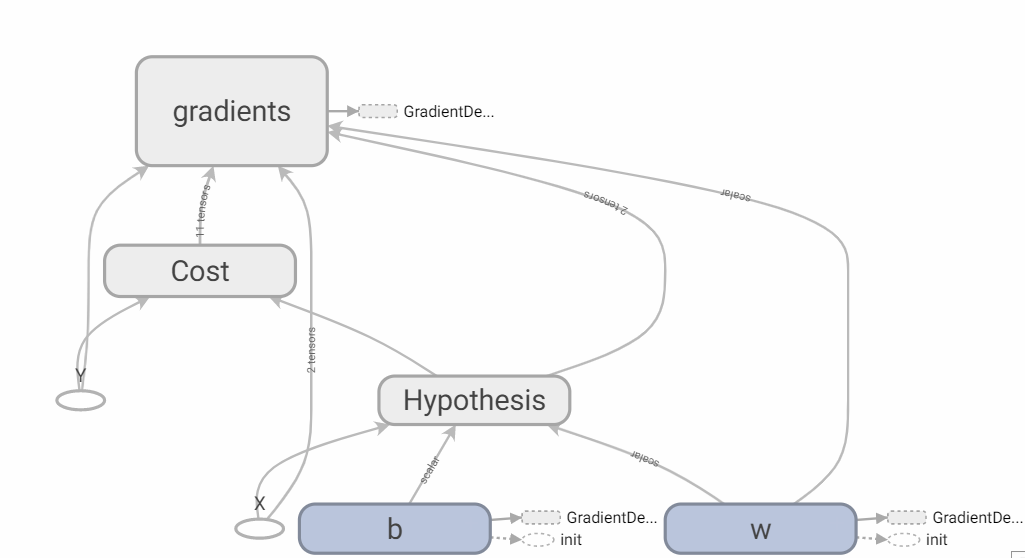

Graphs of the different learning rates>

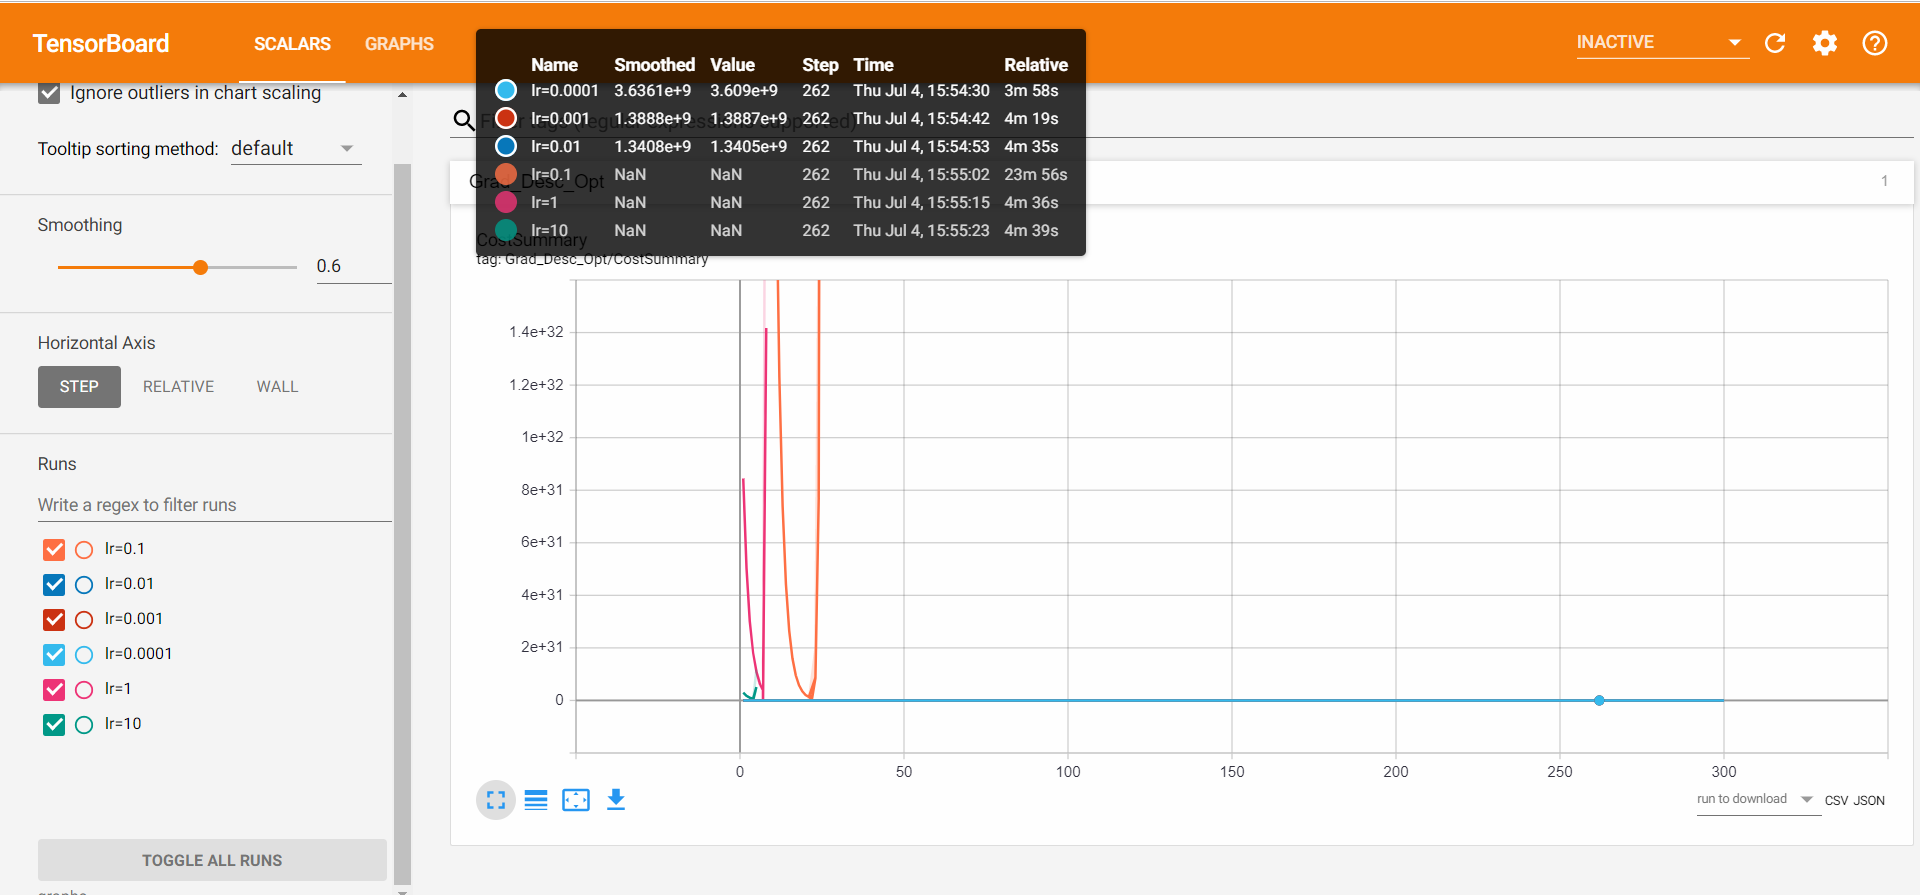

Considerando la grafica siguiente, puede observarse que el lr=0.1 converge en la iteraccion 11 a un minimo del costo... por lo que puede ajustarse los epochs para asegurar convergencia con este valor.

El resto de learning rates estan muy altos o bajos y divergen rapidamente o no llegan a avanzar. Puede probarse ajustar el valor de lr a un poco menos de 0.1 y mayor a 0.01.

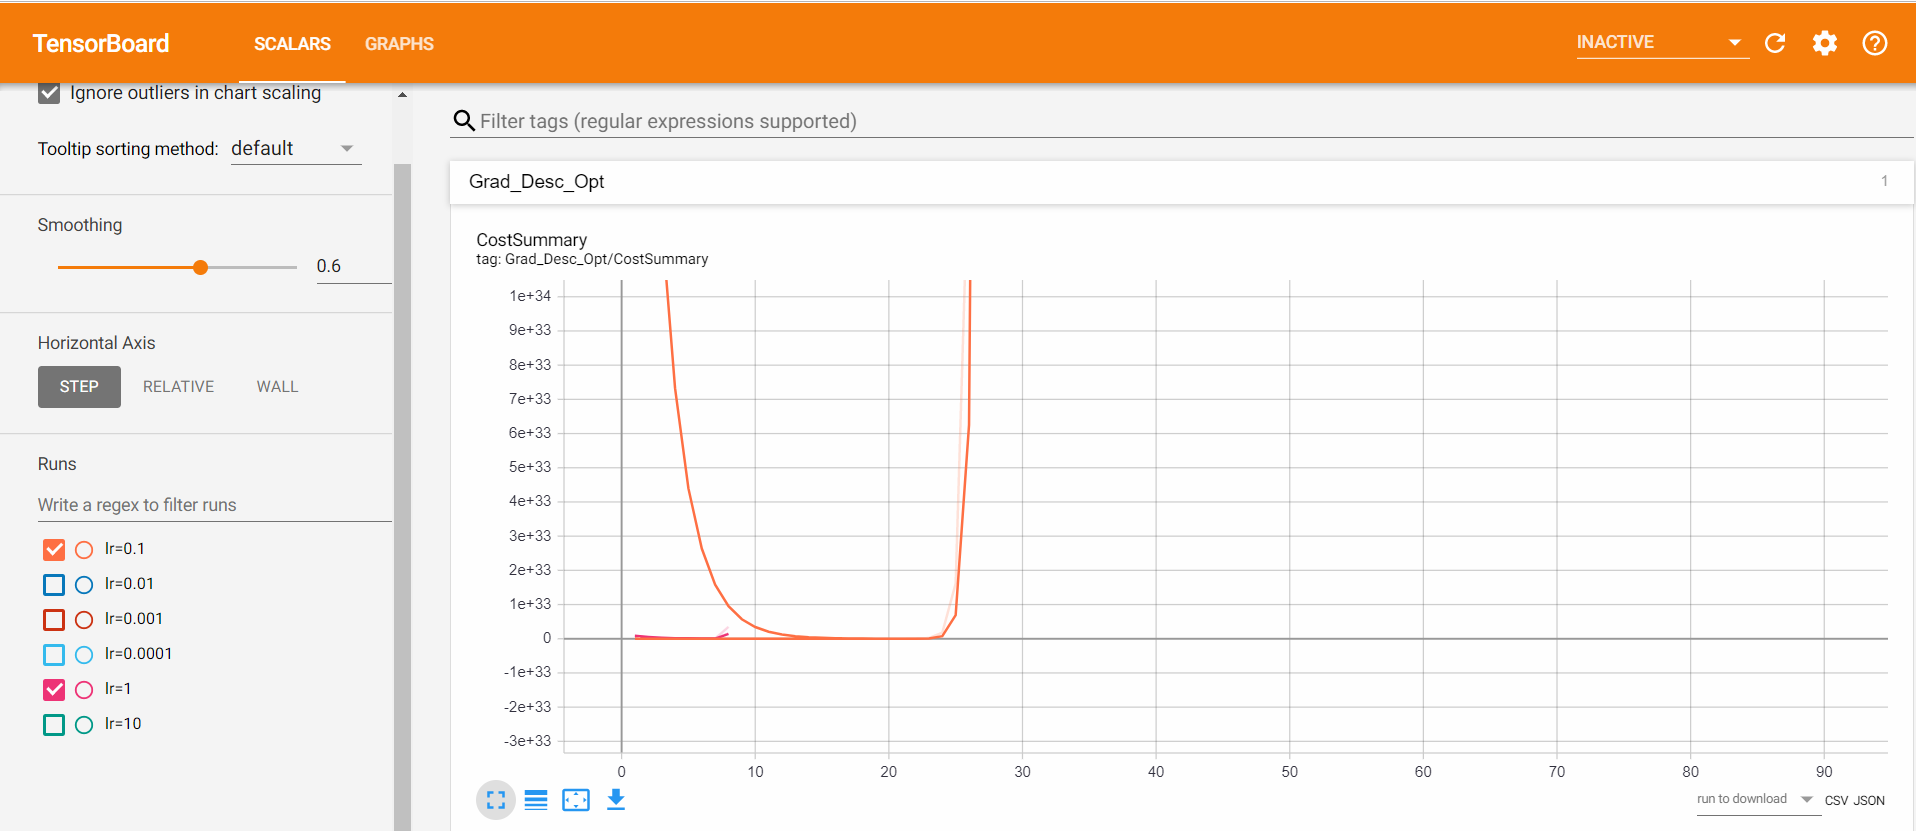

In [48]:
trainmodel(epochs = 40, lr=0.061)

Epoch=10, cost=28153374310400.0, W = -1141081.25, b=-181127.96875
Epoch=20, cost=4.399471581252813e+16, W = -46267360.0, b=-7230294.0
Epoch=30, cost=6.875302943283321e+19, W = -1830203392.0, b=-285787584.0
Epoch=40, cost=1.0744455605239757e+23, W = -72352423936.0, b=-11297566720.0
Total time  0.3699498176574707


Esta es una combinación útil/efectiva> epochs = 40  y lr=0.061. Costo minimo = 1.07

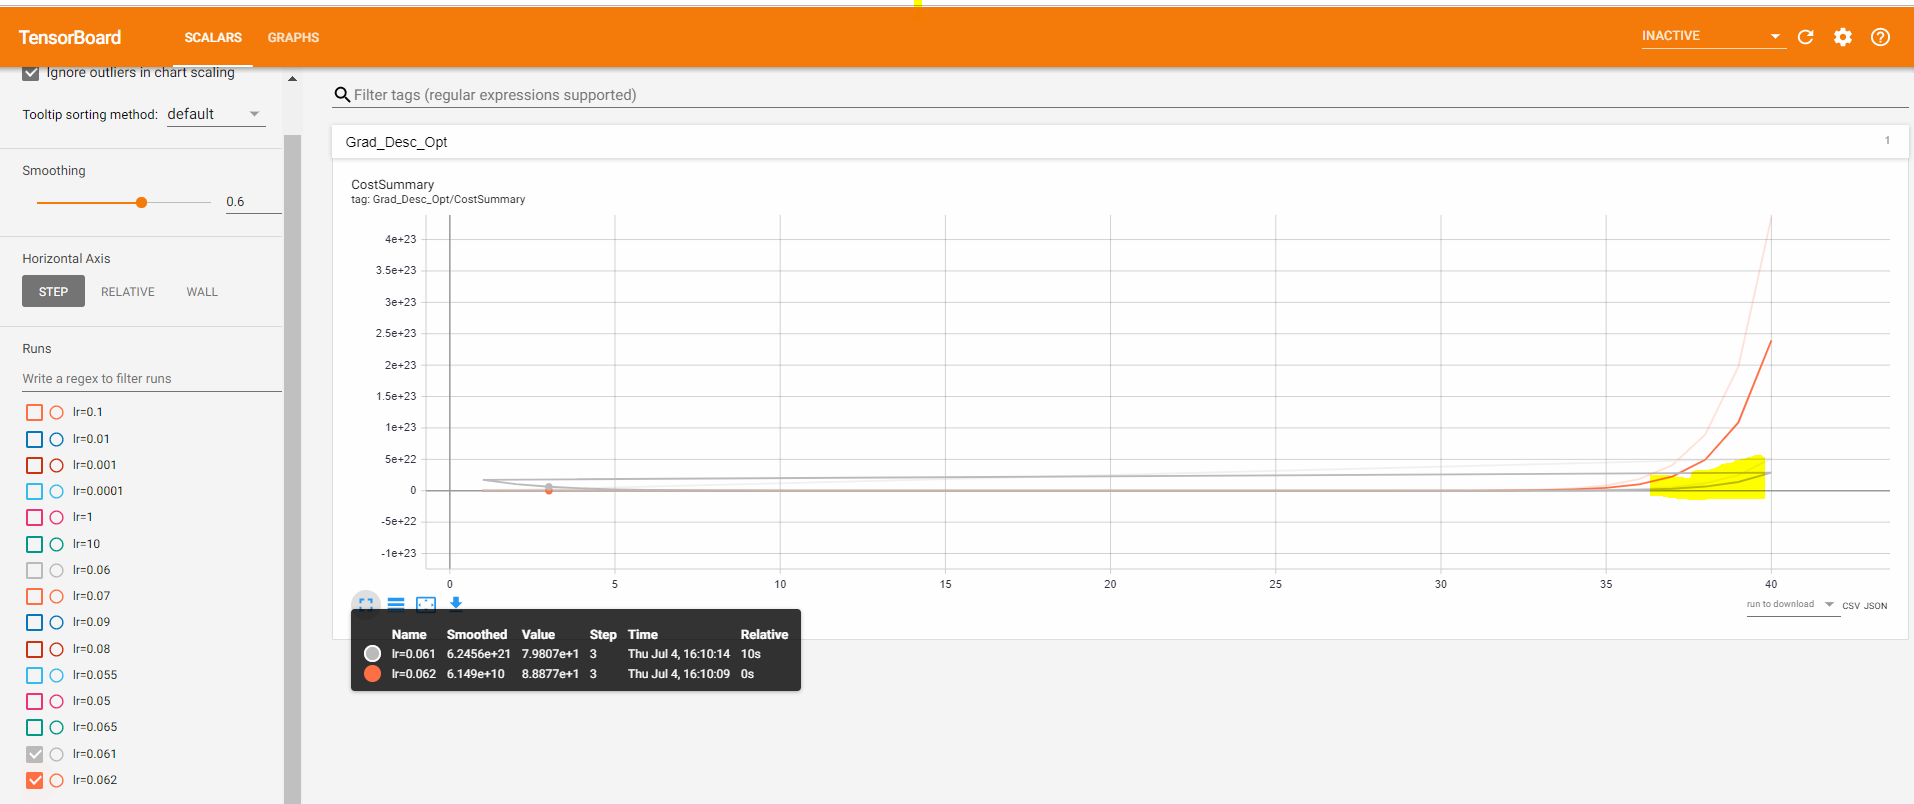